In [1]:
pip install lightgbm


In [2]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score


# Data Preparation

LightGBM accepts multiple data formats: NumPy arrays, Pandas DataFrames, sparse matrices, etc.

In [3]:
# example synthetic dataset
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, size=1000)

# train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)


In [4]:
import lightgbm as lgb

# Prepare datasets
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

# Params
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31
}

# Train with early stopping
model = lgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    valid_sets=[dvalid],

    # use callback
    callbacks=[lgb.early_stopping(stopping_rounds=50)]  
)


[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [5]:
import lightgbm as lgb

# Dataset
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31
}

# Train model
bst = lgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    valid_sets=[dvalid],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# ✅ Now you can use bst
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)


[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

<Figure size 1200x800 with 0 Axes>

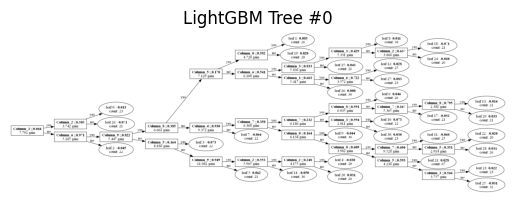

In [6]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Train booster (bst)
bst = lgb.train(params, dtrain, num_boost_round=100)

# Plot tree
plt.figure(figsize=(12, 8))
ax = lgb.plot_tree(bst, tree_index=0, show_info=['split_gain', 'leaf_count'])
plt.title("LightGBM Tree #0")
plt.show()



In [7]:
import os
os.system("dot -V") 

0

In [8]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(
    bst,
    X_train,
    y_train,
    target_name="target",
    feature_names=[f"f{i}" for i in range(X_train.shape[1])],
    class_names=["0", "1"],
    tree_index=0
)
viz.view()  # or viz.save("tree.svg")


ModuleNotFoundError: No module named 'dtreeviz'

In [9]:
!pip install dtreeviz


  Obtaining dependency information for dtreeviz from https://files.pythonhosted.org/packages/b3/e8/44eb59345d8ba9d2f6610df6441d63082f46021c1685de24716c22f55383/dtreeviz-2.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for colour from https://files.pythonhosted.org/packages/74/46/e81907704ab203206769dee1385dc77e1407576ff8f50a0681d0a6b541be/colour-0.1.5-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ----------------------------------- ---- 81.9/91.8 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 91.8/91.8 kB 1.7 MB/s eta 0:00:00


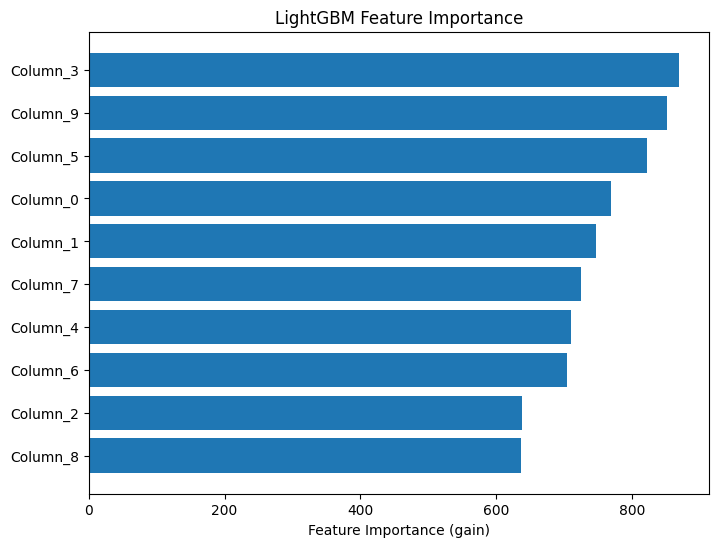

In [10]:
importance = bst.feature_importance(importance_type="gain")
feature_names = bst.feature_name()
sorted_idx = np.argsort(importance)

plt.figure(figsize=(8, 6))
plt.barh([feature_names[i] for i in sorted_idx], importance[sorted_idx])
plt.xlabel("Feature Importance (gain)")
plt.title("LightGBM Feature Importance")
plt.show()


In [3]:
import lightgbm as lgb

# Create datasets
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_valid, label=y_valid, reference=dtrain)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.05,
    'num_leaves': 31
}

# ✅ Correct: use callbacks instead of early_stopping_rounds
bst = lgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    valid_sets=[dvalid],
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Predict
y_pred = bst.predict(X_valid, num_iteration=bst.best_iteration)


[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li